In [11]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np


In [12]:
coffee_production_df = pd.read_csv("data/total-production.csv")

coffee_production_df.head()

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [13]:
coffee_production_df.rename(columns = {"total_production" : "Country"},inplace = True)

coffee_production_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001
5,Indonesia,7441.3830,8493.1960,5569.4780,6743.2880,5367.878,4573.4290,8220.584,7620.778,7295.9550,...,11379.6699,9128.5118,6888.9233,13070.0386,12900.9493,10946.2773,12585.4751,11541.0266,10852.3153,9417.5942
6,Madagascar,982.4470,932.5130,1121.6840,441.8590,641.372,785.0090,849.008,623.804,991.7990,...,456.9613,529.7233,584.8528,499.7094,584.4758,501.4544,425.2061,420.8227,408.7848,396.3764
7,Malawi,104.6280,124.2860,137.1610,62.1110,84.112,91.2350,48.650,60.820,64.3210,...,16.9220,16.9285,25.8264,22.8262,27.7944,24.7098,21.2015,19.5160,14.4703,12.8493
8,Papua New Guinea,962.8410,746.8160,900.1110,1019.4810,1138.659,1002.3630,1089.348,1074.021,1352.1490,...,1037.9942,866.5184,1413.8545,716.4880,835.3594,797.5642,711.9818,1171.1449,733.9382,930.3690
9,Paraguay,130.6270,79.6530,54.2910,70.0460,24.689,22.8430,25.563,23.379,58.3470,...,20.0167,20.1965,20.0195,20.0065,20.0069,20.0725,20.0000,20.0101,20.0024,20.0135


In [14]:
#checking for doubles 
total_countries =  coffee_production_df["Country"].value_counts()
total_countries

Country
Angola                              1
Bolivia (Plurinational State of)    1
Ethiopia                            1
Gabon                               1
Ghana                               1
Guatemala                           1
Guinea                              1
Guyana                              1
Honduras                            1
India                               1
Jamaica                             1
Kenya                               1
Lao People's Democratic Republic    1
Liberia                             1
Mexico                              1
Nepal                               1
Nicaragua                           1
Nigeria                             1
Panama                              1
Sierra Leone                        1
Sri Lanka                           1
Thailand                            1
Togo                                1
Trinidad & Tobago                   1
Uganda                              1
Venezuela                           1
Viet

In [15]:
coffee_production_df.iloc[:, 1:] = coffee_production_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

coffee_production_df['Max Production'] = coffee_production_df.iloc[:, 1:].max(axis=1)
print(coffee_production_df)

                             Country        1990        1991        1992  \
0                             Angola     50.3450     79.3310     77.5200   
1   Bolivia (Plurinational State of)    122.7770    103.5360    120.2350   
2                             Brazil  27285.6286  27293.4934  34603.3542   
3                            Burundi    487.3930    667.1990    620.2380   
4                            Ecuador   1503.8150   2123.8240   1185.4800   
5                          Indonesia   7441.3830   8493.1960   5569.4780   
6                         Madagascar    982.4470    932.5130   1121.6840   
7                             Malawi    104.6280    124.2860    137.1610   
8                   Papua New Guinea    962.8410    746.8160    900.1110   
9                           Paraguay    130.6270     79.6530     54.2910   
10                              Peru    936.6320   1200.4740   1761.9530   
11                            Rwanda    534.8750    483.8300    638.8750   
12          

In [16]:
coffee_production_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874,85.3440
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,157.7020
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206,667.1990
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001,2375.7660
5,Indonesia,7441.3830,8493.1960,5569.4780,6743.2880,5367.878,4573.4290,8220.584,7620.778,7295.9550,...,9128.5118,6888.9233,13070.0386,12900.9493,10946.2773,12585.4751,11541.0266,10852.3153,9417.5942,13070.0386
6,Madagascar,982.4470,932.5130,1121.6840,441.8590,641.372,785.0090,849.008,623.804,991.7990,...,529.7233,584.8528,499.7094,584.4758,501.4544,425.2061,420.8227,408.7848,396.3764,1121.6840
7,Malawi,104.6280,124.2860,137.1610,62.1110,84.112,91.2350,48.650,60.820,64.3210,...,16.9285,25.8264,22.8262,27.7944,24.7098,21.2015,19.5160,14.4703,12.8493,137.1610
8,Papua New Guinea,962.8410,746.8160,900.1110,1019.4810,1138.659,1002.3630,1089.348,1074.021,1352.1490,...,866.5184,1413.8545,716.4880,835.3594,797.5642,711.9818,1171.1449,733.9382,930.3690,1413.8545
9,Paraguay,130.6270,79.6530,54.2910,70.0460,24.689,22.8430,25.563,23.379,58.3470,...,20.1965,20.0195,20.0065,20.0069,20.0725,20.0000,20.0101,20.0024,20.0135,130.6270


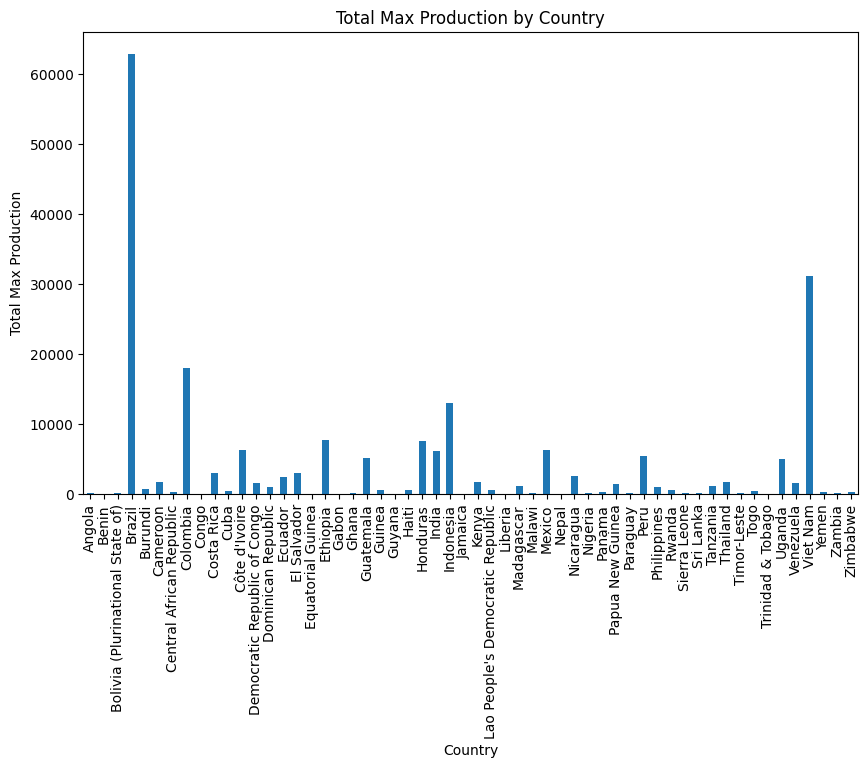

In [17]:
top_country = coffee_production_df.groupby(["Country"])["Max Production"].max()


plt.figure(figsize=(20,8))

top_country.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Max Production')
plt.title('Total Max Production by Country')
plt.savefig("graphs/Total Max Production by Country.png")

plt.show()


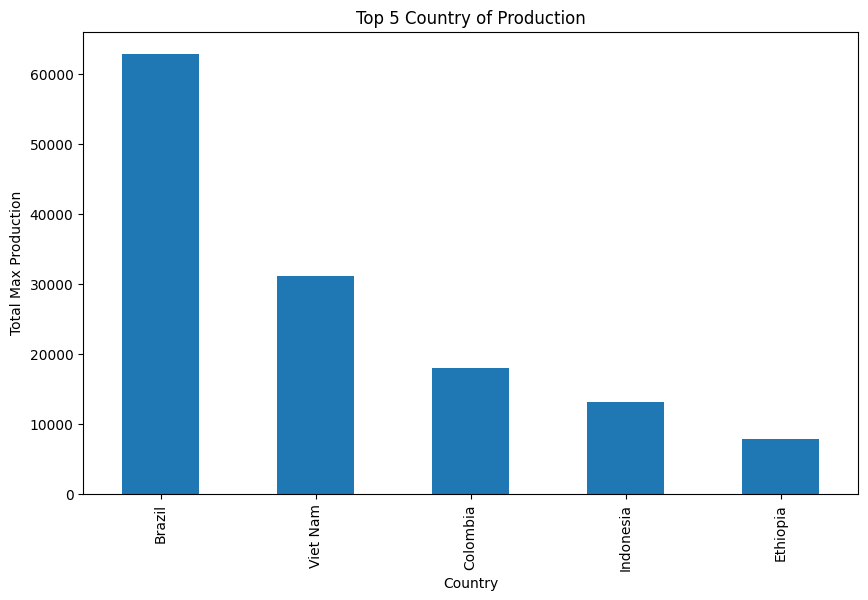

In [18]:
top_5_countries = top_country.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,8))

top_5_countries.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Max Production')
plt.title('Top 5 Country of Production')
plt.savefig("graphs/Top 5 Max Production by Country.png")

plt.show()




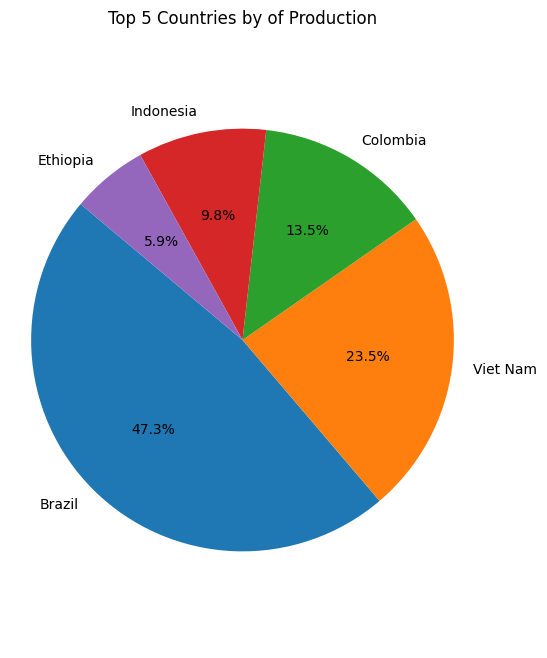

In [19]:
plt.figure(figsize=(6, 8))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 5 Countries by of Production')
plt.savefig("graphs/Top_5_Max_Production_Pie_Graph.png")

plt.show()



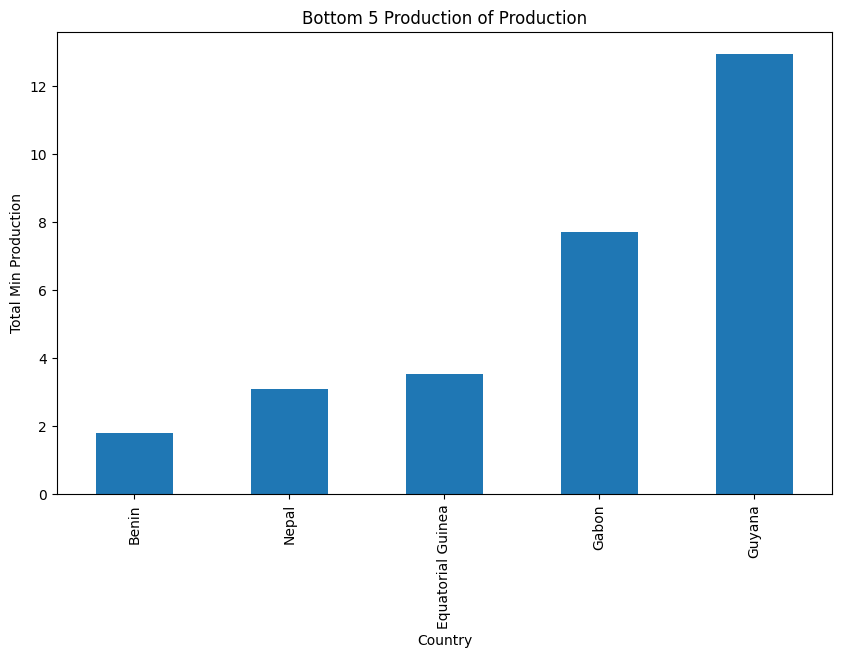

In [20]:
bottom_5_countries = top_country.sort_values(ascending=True).head(5)

plt.figure(figsize=(6,8))

bottom_5_countries.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Min Production')
plt.title('Bottom 5 Production of Production')
plt.savefig("graphs/Bottom_5_Max_Production_by_Country.png")

plt.show()




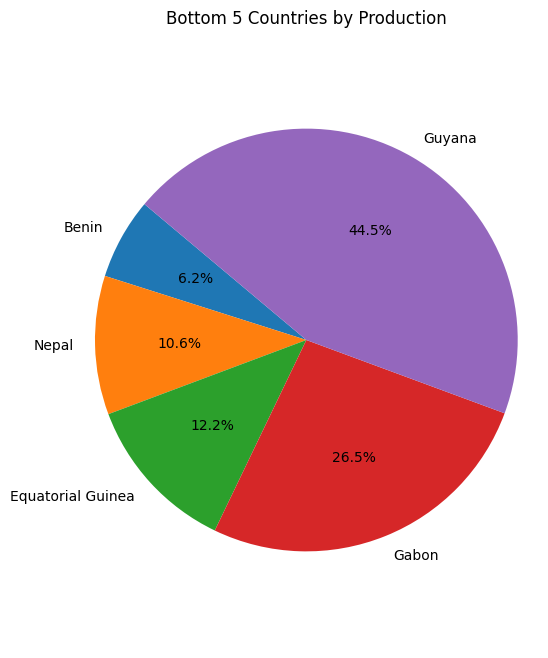

In [21]:
plt.figure(figsize=(6, 8))
plt.pie(bottom_5_countries, labels=bottom_5_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Bottom 5 Countries by Production')
plt.savefig("graphs/Top_5_Max_Production_Pie_Graph.png")

plt.show()



In [22]:
coffee_production_df.reset_index(drop=True, inplace=True)

brazil_df = pd.DataFrame(coffee_production_df.iloc[2]).T

brazil_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836,62924.8836


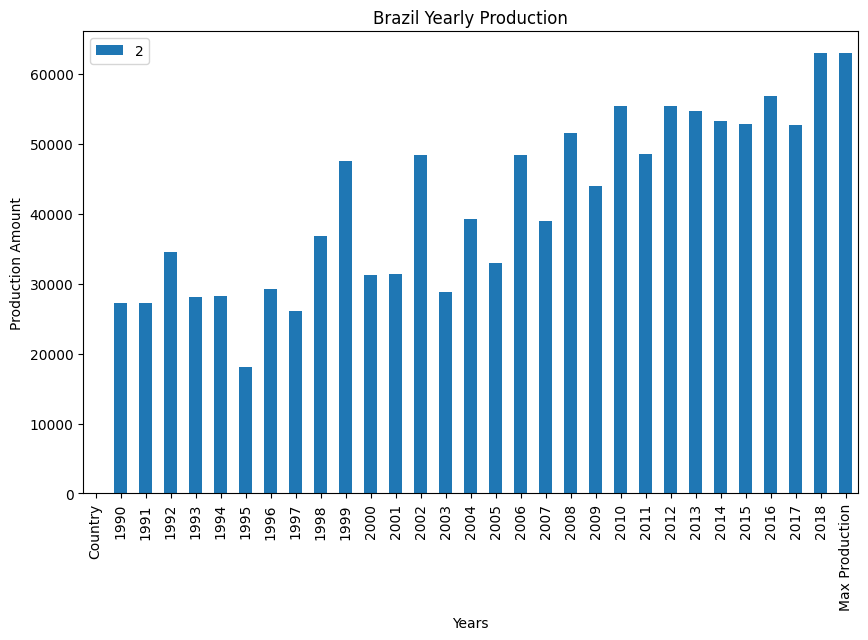

In [23]:
transposed_df = brazil_df.T

transposed_df_numeric = transposed_df.apply(pd.to_numeric, errors='coerce')

transposed_df_numeric.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Brazil Yearly Production')

plt.savefig("graphs/Brazil_Yearly_Production.png")

plt.show()



In [24]:
coffee_production_df.reset_index(drop=True, inplace=True)

viet_nam_df = pd.DataFrame(coffee_production_df.iloc[54]).T

viet_nam_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
54,Viet Nam,1310.288,1437.848,2340.447,3020.216,3631.609,3970.086,5752.481,6978.942,7051.722,...,19999.9999,26499.6111,23402.1057,27609.7814,26499.8404,28736.5941,25540.2932,27887.6555,31174.0742,31174.0742


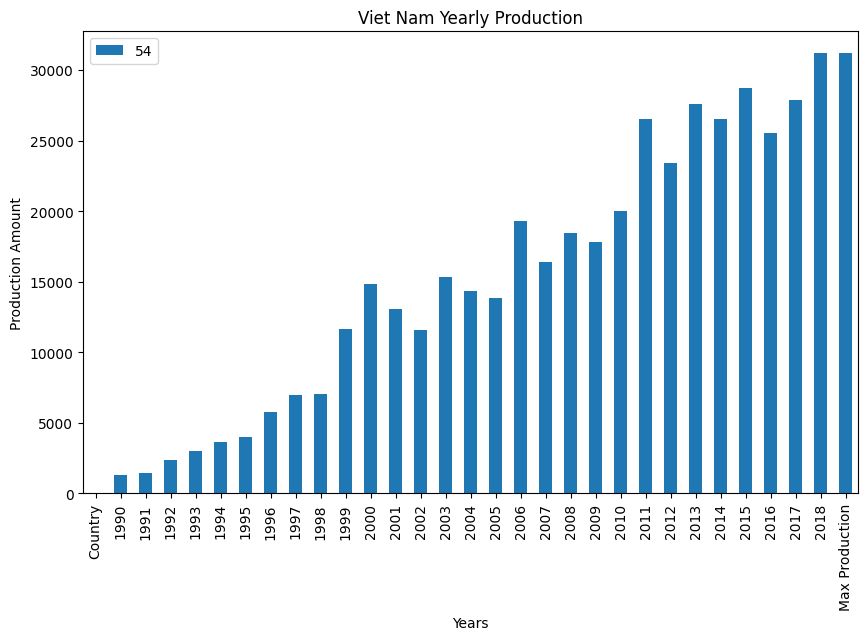

In [37]:
transposed_viet_nam_df = viet_nam_df.T

transposed_df_viet_nam = transposed_viet_nam_df.apply(pd.to_numeric, errors='coerce')

transposed_df_viet_nam.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Viet Nam Yearly Production')
plt.savefig("graphs/Viet_Nam_Yearly_Production.png")

plt.show()

In [26]:
coffee_production_df.reset_index(drop=True, inplace=True)

columbia_df = pd.DataFrame(coffee_production_df.iloc[24]).T

columbia_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
24,Colombia,14396.0,17980.397,14946.878,11422.422,12964.0,12938.018,10778.85,12122.496,10867.962,...,8522.6594,7653.3336,9926.9445,12124.0702,13333.3435,14008.7814,14634.3893,13824.0725,13857.962,17980.397


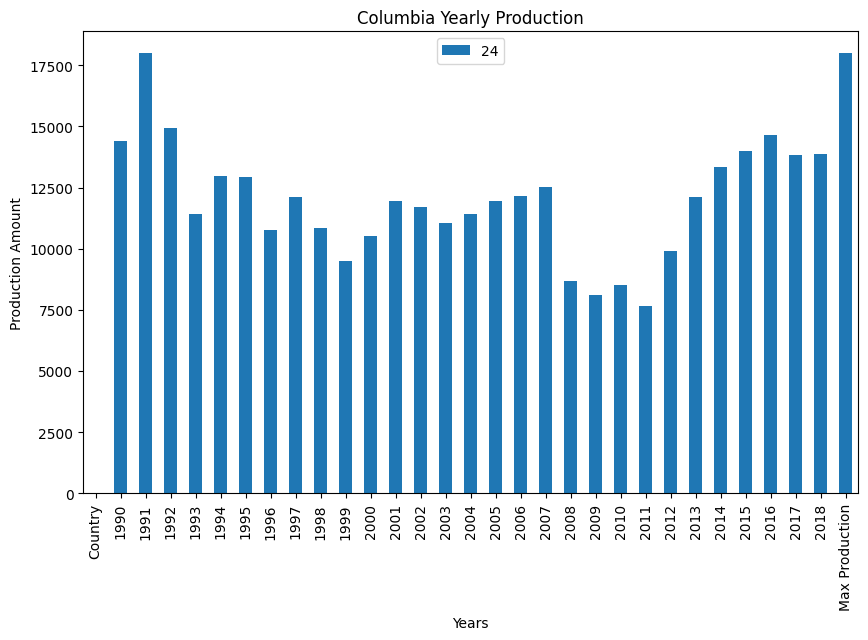

In [38]:
transposed_columbia_df = columbia_df.T

transposed_columbia = transposed_columbia_df.apply(pd.to_numeric, errors='coerce')

transposed_columbia.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Columbia Yearly Production')
plt.savefig("graphs/Columbia_Yearly_Production.png")

plt.show()



In [28]:
coffee_production_df.reset_index(drop=True, inplace=True)

indonesia_df = pd.DataFrame(coffee_production_df.iloc[5]).T

indonesia_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
5,Indonesia,7441.383,8493.196,5569.478,6743.288,5367.878,4573.429,8220.584,7620.778,7295.955,...,9128.5118,6888.9233,13070.0386,12900.9493,10946.2773,12585.4751,11541.0266,10852.3153,9417.5942,13070.0386


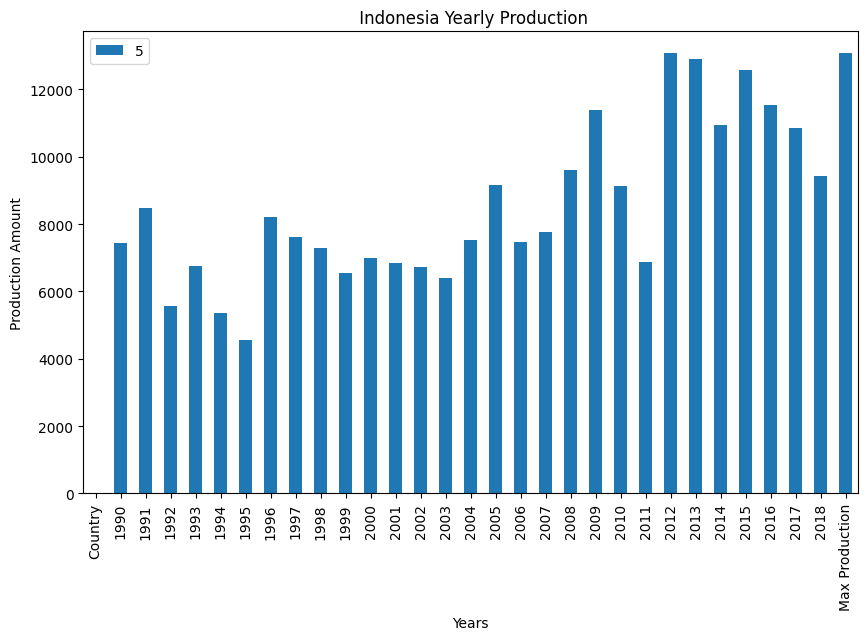

In [39]:
transposed_indonesia_df = indonesia_df.T

transposed_indonesia = transposed_indonesia_df.apply(pd.to_numeric, errors='coerce')

transposed_indonesia.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title(' Indonesia Yearly Production')
plt.savefig('graphs/Indonesia_Yearly_Production.png')

plt.show()

In [30]:
coffee_production_df.reset_index(drop=True, inplace=True)

ethiopia_df = pd.DataFrame(coffee_production_df.iloc[30]).T

ethiopia_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
30,Ethiopia,2909.451,2924.664,1825.171,2967.004,2762.73,3165.322,3407.442,3056.864,2927.725,...,7500.3848,6798.4099,6233.0066,6427.4439,6575.2618,6713.9754,7296.9796,7453.7332,7776.2234,7776.2234


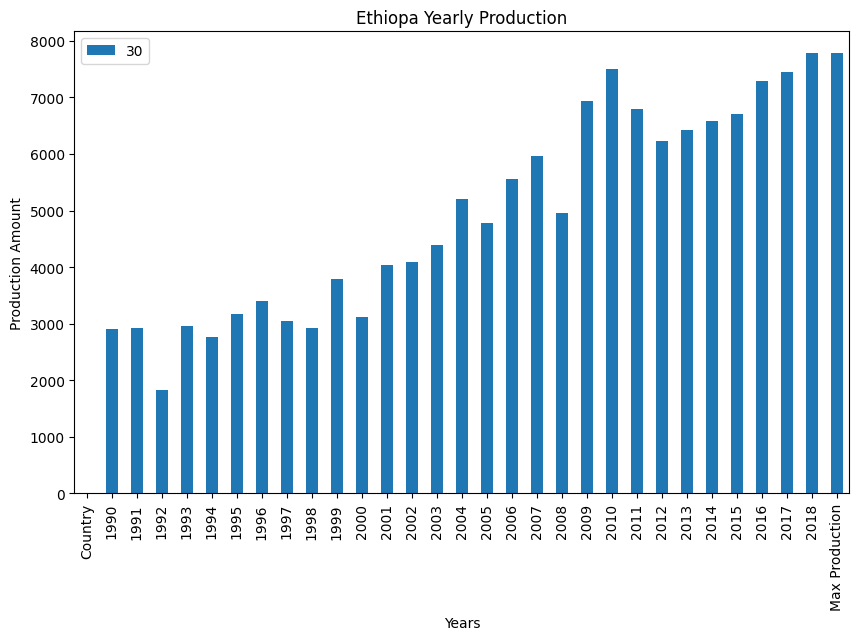

In [40]:
transposed_ethiopia_df = ethiopia_df.T

transposed_ethiopia = transposed_ethiopia_df.apply(pd.to_numeric, errors='coerce')

transposed_ethiopia.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Ethiopa Yearly Production')
plt.savefig("graphs/Ethiopa_Yearly_Production.png")

plt.show()



In [35]:
coffee_production_df.reset_index(drop=True, inplace=True)

benin_df = pd.DataFrame(coffee_production_df.iloc[21]).T

benin_df





,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Max Production
21,Benin,0.0,0.0,1.805,0.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.805


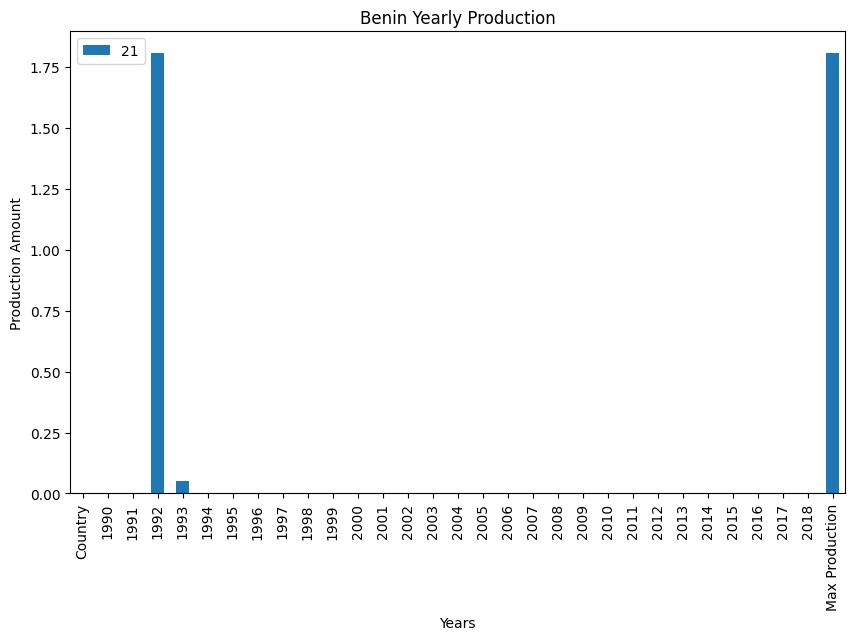

In [41]:

transposed_benin_df = benin_df.T

transposed_benin = transposed_benin_df.apply(pd.to_numeric, errors='coerce')

transposed_benin.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Benin Yearly Production')
plt.savefig("graphs/Benin_Yearly_Production.png")

plt.show()

In [ ]:
coffee_production_df.reset_index(drop=True, inplace=True)

benin_df = pd.DataFrame(coffee_production_df.iloc[21]).T

benin_df

In [ ]:

transposed_benin_df = benin_df.T

transposed_benin = transposed_benin_df.apply(pd.to_numeric, errors='coerce')

transposed_benin.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Production Amount')
plt.title('Benin Yearly Production')
plt.savefig("graphs/Benin_Yearly_Production.png")

plt.show()